Here we will focus on comparison graphs. Note, we are importing another dataset directly from Seaborn.
Some of the datasets you can import from Seaborn include anagrams, anscombe, attention, brain_networks, car_crashes*, diamonds*, dots, exercise*, flights, fmri, gammas, geyser, iris*, mpg*, penguins*, planets, taxis*, tips*, titanic*

We will import our data and take a look at it like we did in the data prep notebook.

In [1]:
import seaborn as sns
#import squarify 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from pywaffle import Waffle
import plotly.graph_objects as go
from plotly.subplots import make_subplots
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
#Get some info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
#And some summary stats
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [4]:
#Where are our nulls
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
#Let's get rid of our nulls
data['bill_length_mm'].fillna(data['bill_length_mm'].mean(), inplace=True)
data['bill_depth_mm'].fillna(data['bill_depth_mm'].mean(), inplace=True)
data['flipper_length_mm'].fillna(data['flipper_length_mm'].mean(), inplace=True)
data['body_mass_g'].fillna(data['body_mass_g'].mean(), inplace=True)
data['sex'].fillna(data['sex'].value_counts().index[0], inplace=True)
data.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
#Now, let's look at the cleaned up data
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


Let's start building our visualizations showing comparisons. Note, I am focused here on showing you graph types, not necessarily on using good visualization design principles.

The general pattern of specifying a plot here using seaborn is:
viz = sns.<typeplot>(data, kind, x, y, style, col, size, ci, row, hue, palette, order, orient, height, aspect, markers, linestyles, split, inner, col_wrap)

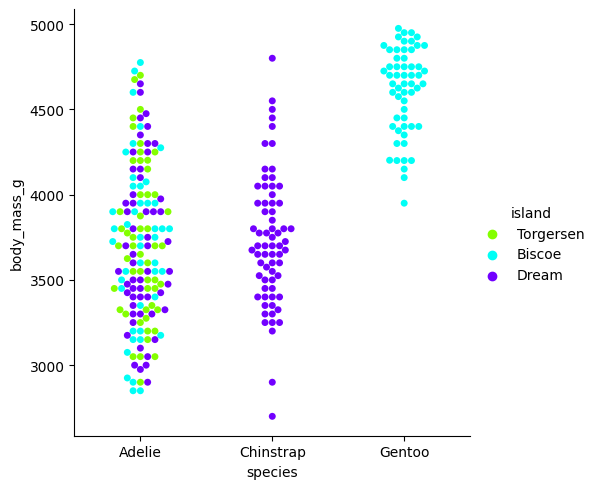

In [7]:
viz = sns.catplot(
    x = "species", y = "body_mass_g",
    kind = "swarm",
    hue = "island",
    palette = "hsv",
    data = data.query("body_mass_g > 3500" and "body_mass_g < 5000")
)

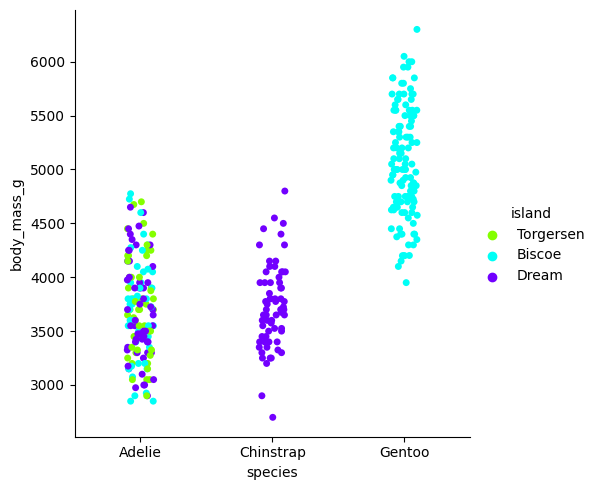

In [8]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "strip",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

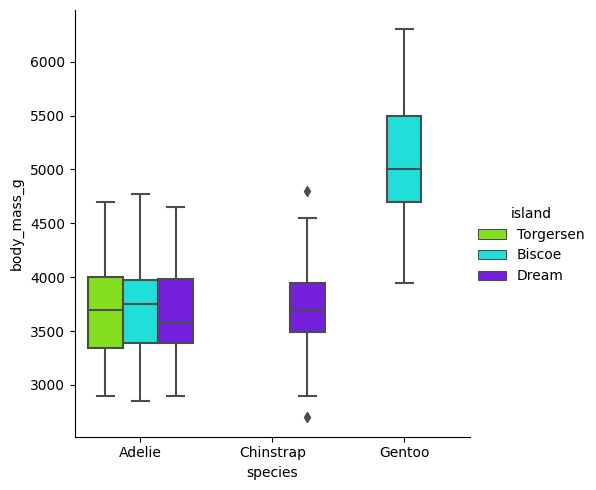

In [9]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "box",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

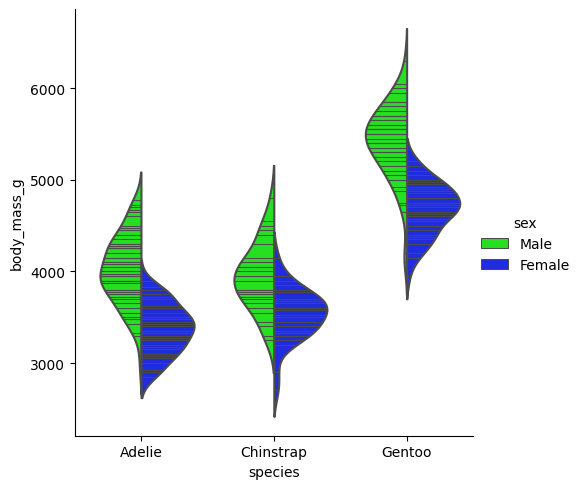

In [10]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "violin",                    #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "sex",
    split = True,
    inner = "stick",
    palette = "hsv"
)

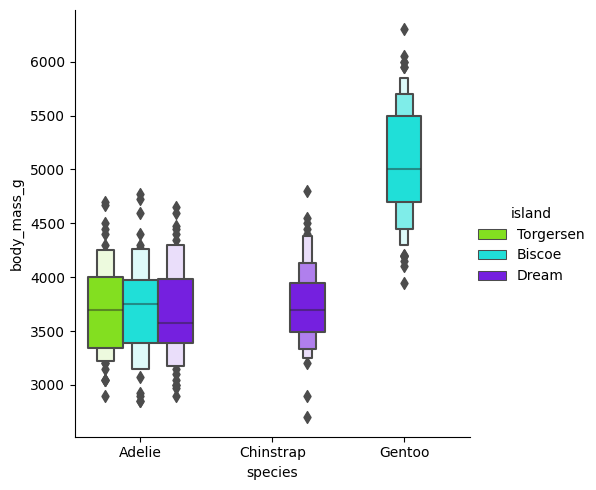

In [11]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "boxen",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

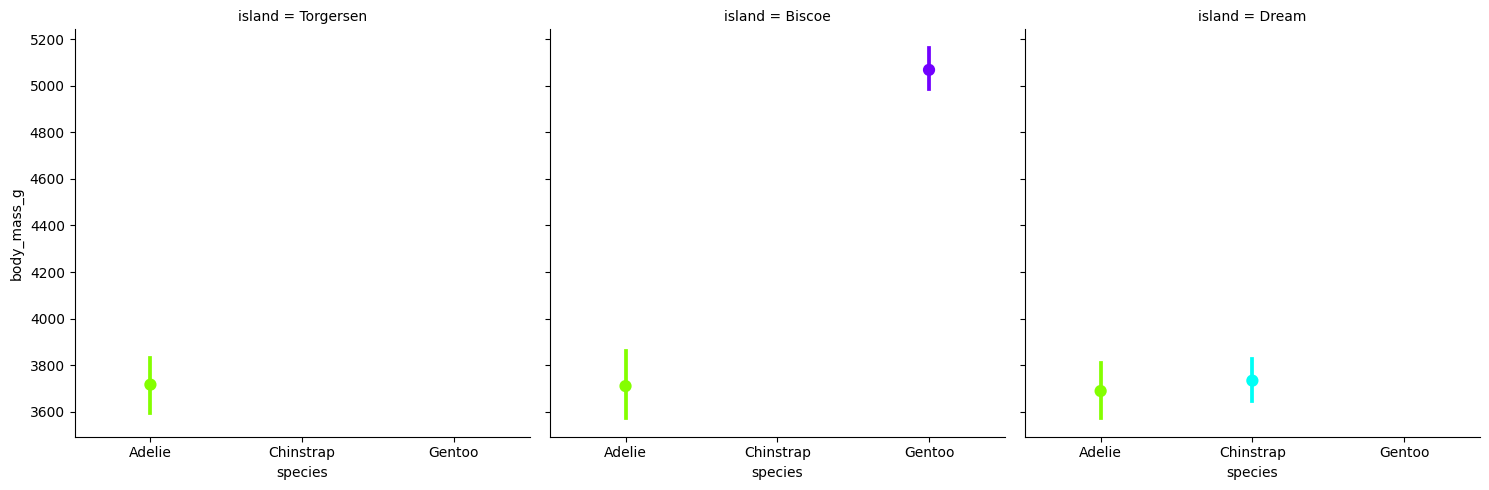

In [12]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "point",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    col = "island",
    palette = "hsv"
)

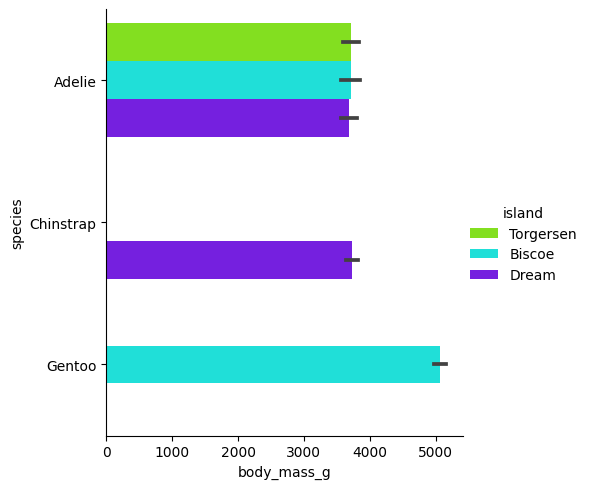

In [13]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "bar",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "body_mass_g",
    y = "species",
    hue = "island",
    orient = "h",
    palette = "hsv"
)

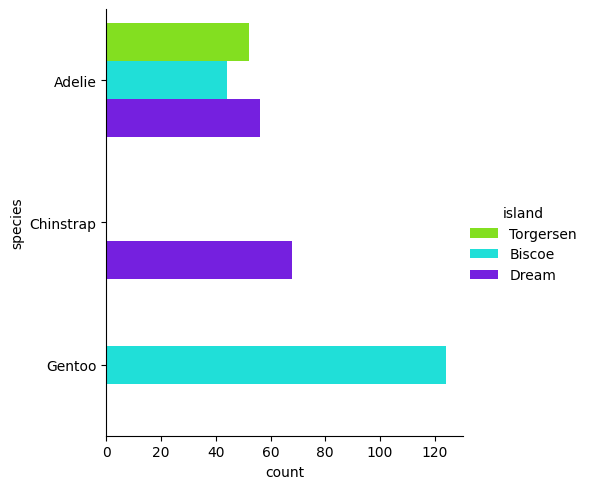

In [14]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "count",                     #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    y = "species",
    #y = "body_mass_g",
    hue = "island",
    orient = "h",
    palette = "hsv"
)

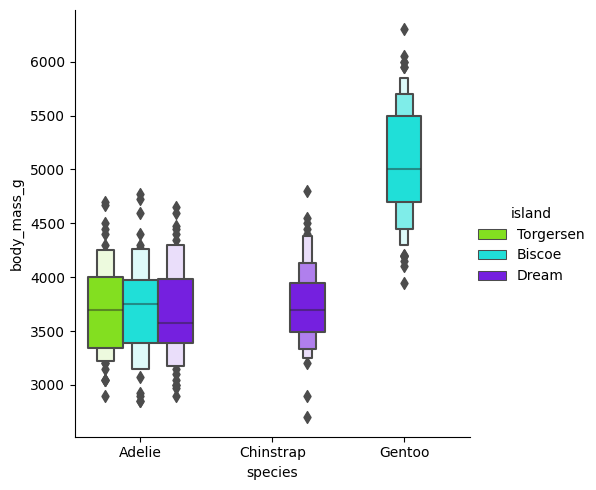

In [15]:
viz = sns.catplot(                      #What category of plot (catplot, relplot, displot)
    data=data,                          #What is your dataset?
    kind = "boxen",                      #Plot type [catplot (strip, box, violin, boxen, point, bar, count, swarm)
    x = "species",
    y = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

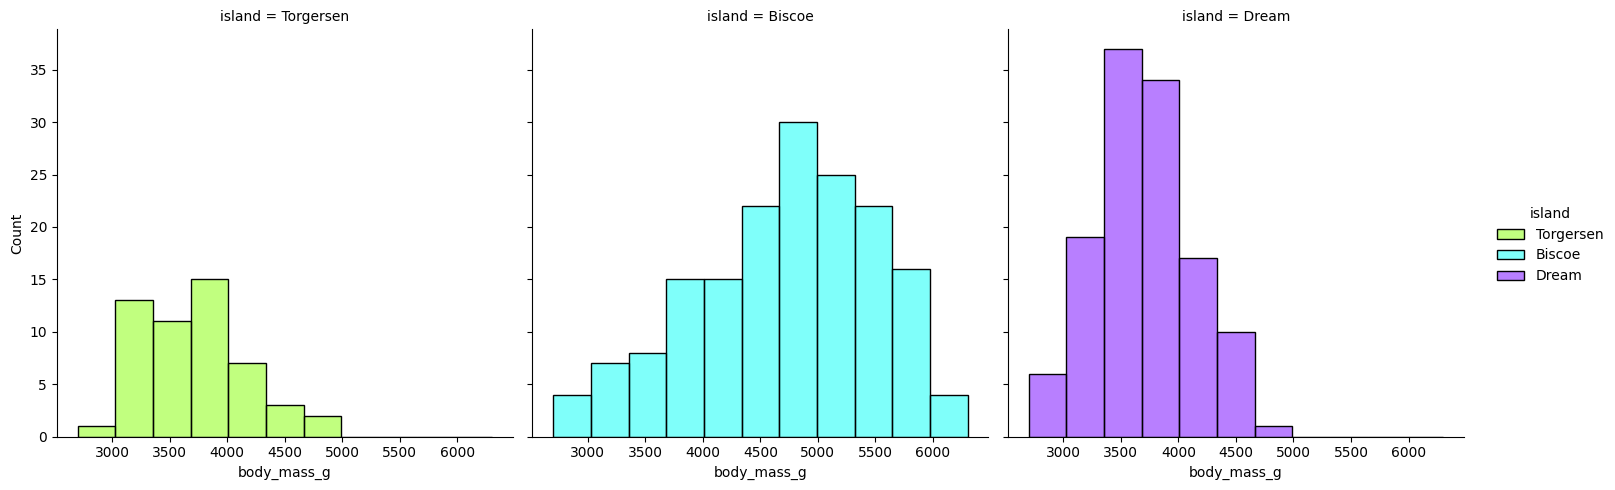

In [16]:
viz = sns.displot(                      #What category of plot (catplot, relplot, displot)
    data = data,                          #What is your dataset?
    kind = "hist",                     #Plot type [displot (hist, kde, ecdf)]
    #x = "species",
    col = "island",
    x = "body_mass_g",                  #To make graphs horizontal, simply change x to y
    hue = "island",
    palette = "hsv"
)

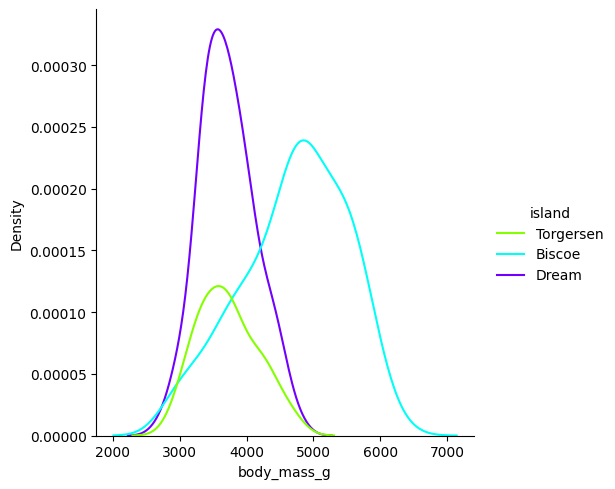

In [17]:
viz = sns.displot(                      #What category of plot (catplot, relplot, displot)
    data = data,                          #What is your dataset?
    kind = "kde",                     #Plot type [displot (hist, kde, ecdf)]
    #x = "species",
    x = "body_mass_g",                  #To make graphs horizontal, simply change x to y
    hue = "island",
    palette = "hsv"
)

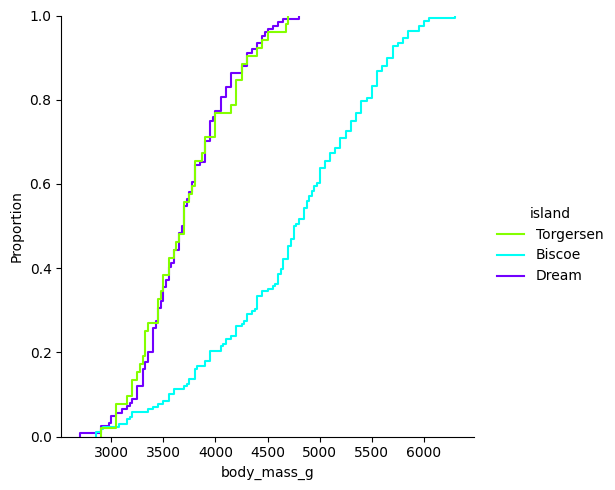

In [18]:
viz = sns.displot(                      #What category of plot (catplot, relplot, displot)
    data = data,                          #What is your dataset?
    kind = "ecdf",                     #Plot type [displot (hist, kde, ecdf)]
    #x = "species",
    x = "body_mass_g",                  
    hue = "island",
    palette = "hsv"
)

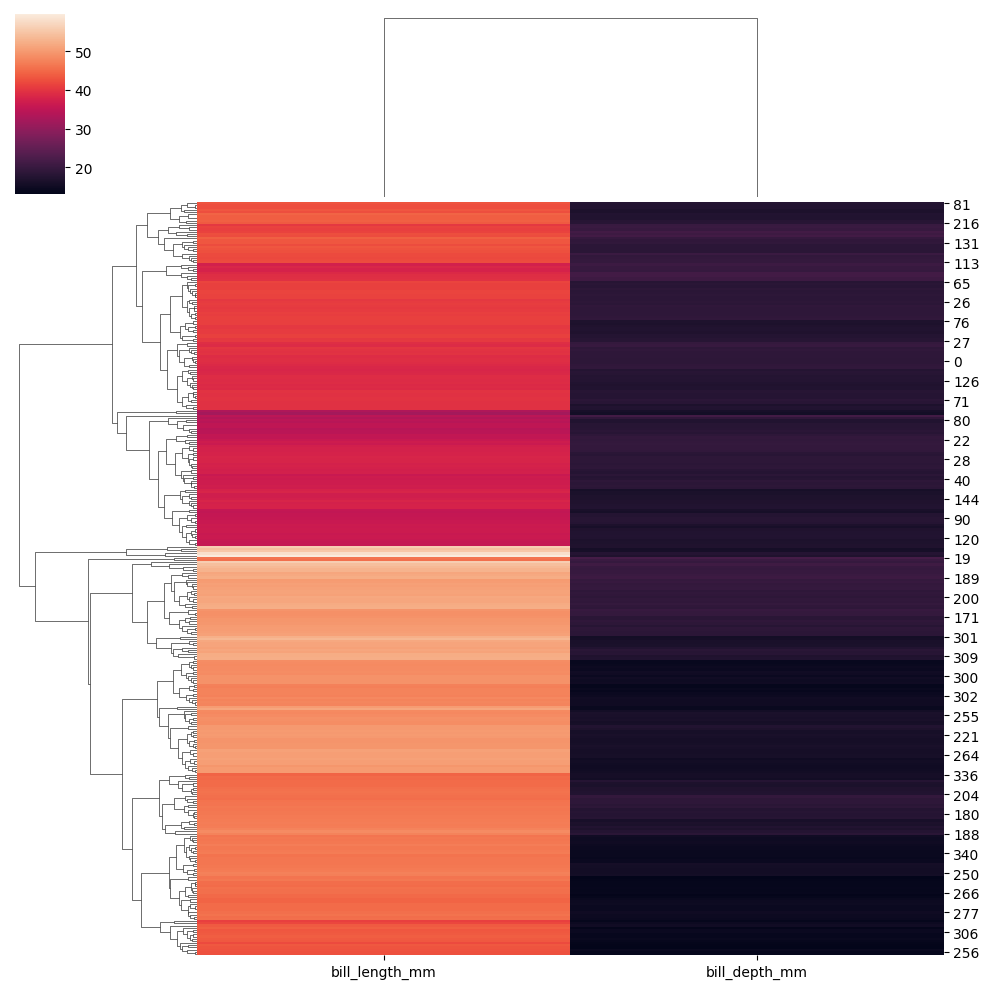

In [19]:
viz = sns.clustermap(
    data = data.drop(["species", "island", "sex", "body_mass_g", "flipper_length_mm"], axis = 1)
)

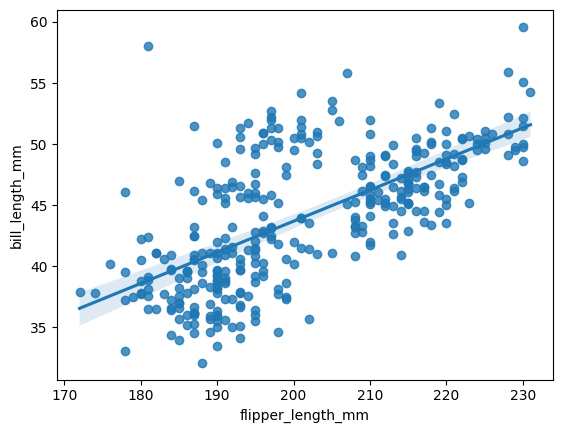

In [20]:
viz = sns.regplot(
    data = data,
    x = "flipper_length_mm",
    y = "bill_length_mm",
    ci = 99,
)

C:\Users\hruss\AppData\Local\Temp\ipykernel_19392\3447772575.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights = flights.pivot("month", "year", "passengers")


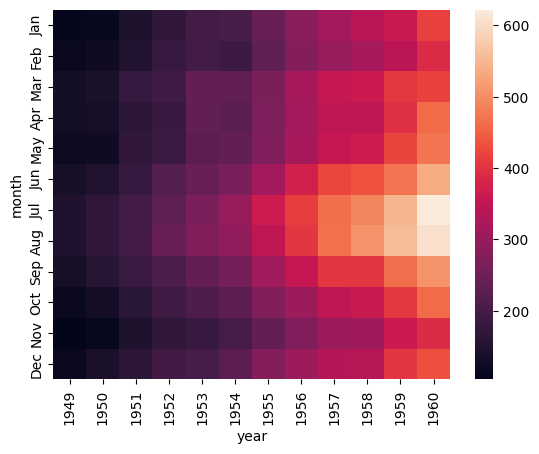

In [21]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

In [22]:
#Create groups to compare across. There are approaches that don't require pre-grouping, but some do (eg. treemap).
#Bill length by species, island and sex
#Bill depth by species, island and sex 
#Body mass by species, island and sex
#Flipper length by species, island and sex
species_count = data.groupby('species')[['species']].count()
sex_count = data.groupby('sex')[['sex']].count()
island_count = data.groupby('island')[['island']].count()
species_billlen = data.groupby('species')[['bill_length_mm']].mean()
species_billdep = data.groupby('species')[['bill_depth_mm']].mean()
species_flipperlen = data.groupby('species')[['flipper_length_mm']].mean()
species_bodymass = data.groupby('species')[['body_mass_g']].mean()
island_billlen = data.groupby('island')[['bill_length_mm']].mean()
island_billdep = data.groupby('island')[['bill_depth_mm']].mean()
island_flipperlen = data.groupby('island')[['flipper_length_mm']].mean()
island_bodymass = data.groupby('island')[['body_mass_g']].mean()
sex_billlen = data.groupby('sex')[['bill_length_mm']].mean()
sex_billdep = data.groupby('sex')[['bill_depth_mm']].mean()
sex_flipperlen = data.groupby('sex')[['flipper_length_mm']].mean()
sex_bodymass = data.groupby('sex')[['body_mass_g']].mean()
print(island_bodymass)


           body_mass_g
island                
Biscoe     4712.956871
Dream      3712.903226
Torgersen  3715.899123
